In [369]:
# Import libraries we need
# we will use sklearn, numpy and matplotlib
from scipy.optimize import minimize
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
%matplotlib inline
boston = load_boston()

In [42]:
print boston.DESCR


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [ ]:
boston.data[1:200,1]

In [151]:
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Smaller Datset 

In [179]:
x = np.array(boston.data[:, [0,1,2,4,5,6,7,9,10,11]])


In [ ]:
plt.scatter(boston.data[:,5], boston.target, color = 'r')

# Run regression of house prices on number of rooms

In [153]:
import numpy as np
x = boston.data[:,5]
x = np.array([[v] for v in x])
y = boston.target
x.shape
y.shape

(506L, 1L)

In [154]:
slope,_,_,_= np.linalg.lstsq(x,y)
slope

array([ 3.6533504])

Add constant parameter

In [155]:
x = boston.data[:,5]
x = np.array([[v,1] for v in x])
y = boston.target
(slope,bias),_,_,_ = np.linalg.lstsq(x,y)
print slope, bias

9.10210898118 -34.6706207764


In [300]:
# reshape y as I think it is messing up grad descent calc
# make sure its m*1
y = np.reshape(y, (x.shape[0],1))
y.shape

(506L, 1L)

In [156]:
(slope,bias),total_error,_,_ = np.linalg.lstsq(x,y)
rmse = np.sqrt(total_error[0]/len(x))
print rmse

6.60307138922


## Normalisation

In [158]:

def Normalise(x):
    # N.B should not have constant yet
    # returns matrix with each column mean = 0, std = 1
    x_norm = (x - x.mean(axis=0))/x.std(axis=0,ddof=1)
    return x_norm

In [181]:
x[2,0:8]
x_norm = Normalise(x)
x_norm
x_norm = np.insert(x_norm,0,1,1) # must append col of ones
print x_norm[2,:]

[ 1.         -0.4148611  -0.48724019 -0.59279438 -0.73953036  1.28144555
 -0.26554897  0.55660905 -0.98635338 -0.3027945   0.39603507]


# Multivariate Regression


## First do regression like book, then try normal eqns approach
X is normalised from this point on

In [182]:
x = x_norm
y = boston.target
s,total_error,_,_ = np.linalg.lstsq(x,y)
rmse = np.sqrt(total_error/len(x))
print rmse

[ 5.31673233]


In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True)

In [184]:
x[0:3,0:4]

array([[ 1.        , -0.41730039,  0.28454827, -1.28663623],
       [ 1.        , -0.41485878, -0.48724019, -0.59279438],
       [ 1.        , -0.4148611 , -0.48724019, -0.59279438]])

In [185]:

lr.fit(x,y)
p = map(lr.predict,x)

In [186]:
e = p-y
total_error = np.sum(e*e)
rmse_train = np.sqrt(total_error/len(p))
print('RMSE on training set: {}'.format(rmse_train))

RMSE on training set: 266.700512964


In [187]:
print np.sqrt(total_error/len(p))

266.700512964


## Cross validation

In [166]:
from sklearn.cross_validation import KFold
kf = KFold(len(x), n_folds = 10)
err = 0


## loop that calculates regressions on different variables and selects the best

In [167]:
for train,test in kf:
    lr.fit(x[train], y[train])
    p = map(lr.predict, x[test])
    e = p-y[test]
    err += np.sum(e*e)
rmse_10cv = np.sqrt(err/len(x))
print('rmse on 10 fold cross validation: {}'.format(rmse_10cv))

rmse on 10 fold cross validation: 65.1374830957


## Regularised Regression (Ridge and Lasso and Eastic Nets

In [168]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(fit_intercept = True, alpha = 0.5)
en.fit(x,y)
p = map(en.predict,x)


In [169]:
e = p-y
err = np.sum(e*e)
rmse = np.sqrt(err/len(x))
print('RMSE for the training set: {}'.format(rmse)) 

RMSE for the training set: 247.821435539


In [170]:
kf1 = KFold(len(x), n_folds=10)
err=0
for train,test in kf1:
    en.fit(x[train],y[train])
    p = map(en.predict, x[test])
    e = p-y[test]
    err += np.sum(e*e)
rmse_10cv1 = np.sqrt(err/len(x))
print('RMSE for Elastic net: {}'.format(rmse_10cv1))

RMSE for Elastic net: 61.3624803056


## Solve model Analytically

In [188]:
# using solve
#x = boston.data
#x = np.insert(x,0,1,1) # append col on ones
xx = x.T.dot(x)
xy = x.T.dot(y)
Beta = np.linalg.solve(xx,xy)
print Beta

[ 22.53280632  -1.06817758   0.76463106  -0.55720013  -2.02234253
   4.57127478  -1.35639418  -3.33394924   0.03534378  -2.06091784
   1.22754427]


In [189]:
# using inverse and normalisation
xx1 =  np.linalg.inv(x.T.dot(x))
xy = x.T.dot(y)
Beta1 = xx1.dot(xy)
print Beta1

[ 22.53280632  -1.06817758   0.76463106  -0.55720013  -2.02234253
   4.57127478  -1.35639418  -3.33394924   0.03534378  -2.06091784
   1.22754427]


[ 1.         -0.48724019 -0.59279438 -0.73953036] [ 1.         -0.48724019 -0.59279438 -0.73953036]


## Regularise with Identity matrix size of X

In [191]:
IdentSize = x.shape[1] # no of cols of x
IdentMatrix = np.zeros((IdentSize,IdentSize))
np.fill_diagonal(IdentMatrix,1)
IdentMatrix[0,0] = 0  # don't regularize the constant
# experiment with different lambda values
# could also write a for loop to calculate best lambda
lamb = 0.3  # if this is 0 then we just have normal OLS
lamb1 = np.arange(0,1,0.1)
print lamb1

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


In [192]:
## Calculate normal eqns
xxreg = x.T.dot(x) + lamb*IdentMatrix
xy = x.T.dot(y)
BetaReg = np.linalg.solve(xxreg,xy)
print('Regularised Beta: {}'.format(BetaReg))

Regularised Beta: [ 22.53280632  -1.0670519    0.76304763  -0.55710947  -2.01604802
   4.56955182  -1.35383986  -3.32447592   0.03234886  -2.05965736
   1.22700085]


In [290]:
## Caluculate RMSE
rmse = []
for i in lamb1:
    xxreg = x.T.dot(x) + i*IdentMatrix
    xy = x.T.dot(y)
    BetaReg = np.linalg.solve(xxreg,xy)
    err = (y- x.dot(BetaReg))
    RSS = np.sum(err.T * err)
    RMSE = (np.sqrt(RSS/len(x)))
    rmse.append(RMSE)
    #rmse.append(rmse)
print('RMSE with regularisation:{}'.format(rmse))
# For some reason I get the correct answer doing it manually rather than using 
# sklearn tools
########################################
## Lambda = 0.4 : RMSE = 4.684
## Lambda = 0.3 : RMSE = 4.684

RMSE with regularisation:[5.3167323344854402, 5.3167327157333206, 5.3167338569370557, 5.3167357543043474, 5.3167384040661823, 5.3167418024766597, 5.3167459458128254, 5.3167508303745024, 5.3167564524841291, 5.3167628084865957]


# Next we want to use gradient descent to calculate optimum

In [194]:
np.shape(x[1])

(11L,)

## Gradient Descent
We need to find a cost function J and then apply gradient descent iteratively
Our cost function will be the residual sum of squares averaged and then we will apply regularisation 
to it.


In [323]:
initial_theta = np.zeros((x.shape[1],1))
initial_theta
h = x.dot(initial_theta)
h.shape

(506L, 1L)

## Function to compute cost

In [310]:
# Function to compute the cost
# note, make sure specify y is M*1 as this was messing with calc before
def ComputeCost(theta,x,y):
    m = len(y)
    J = 0
    h = x.dot(theta)
    e = (y-h)
    #J = (0.5*m) * np.sum(np.square(h-y))
    J = (0.5*m) * np.sum(e.T.dot(e))
    return J    

(506L, 1L)

## regularised cost function

In [297]:
def regCostFunction(theta,x,y,lamb):
    m =  len(y)
    J = 0
    h = x.dot(theta)
    e = (y-h)
    # dont regularise constant
    J = (0.5*m) * np.sum(e.T.dot(e)) + (lamb*0.5*m) * np.sum(np.square(theta[1:]))
    return J


In [ ]:
x.dot(initial_theta)
temp_theta = np.zeros(initial_theta.shape)
temp_theta
x.shape


In [336]:
ComputeCost(initial_theta,x,y)

75805464.020000026

In [341]:
regCostFunction(initial_theta,x,y,0.2) # not much affect since our model is linear

75805464.020000026

## Gradient Descent Algorithm

For this we need Theta,x,y,J. We calculate the gradient at each theta value and then
Compute the cost. We iterate until we get convergence or for the number of specified iterations

In [306]:
# Kind of strange answer
def gradDescent(theta,x,y,alpha,runs):
    # intialise parameters
    m = len(y)
    J_hist = np.zeros(runs)
    
    #main loop
    for i in np.arange(runs):
        h = x.dot(theta)
        temp_theta = np.zeros(theta.shape)
        # derivative of cost function: gradient (vector of partial derivatives)
        # second loop to calculate gradient at each theta
        for j in np.arange(theta.shape[0]):
            temp_theta[j] = temp_theta[j] - ((1/float(m)) * alpha * np.sum((h-y) * x[:,j]))
    
        theta = temp_theta
        J_hist[i] = ComputeCost(theta,x,y)
    return J_hist,theta

('theta: ', array([  1.59916880e+11]))


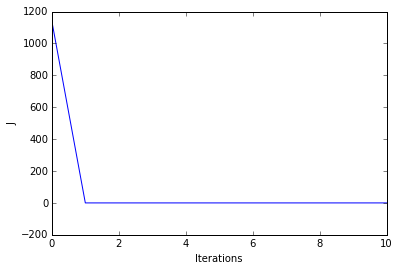

In [357]:
theta, J = gradDescent(initial_theta,x,y,0.1,1)
plt.plot(J)
plt.ylabel('J')
plt.xlabel('Iterations');
print('theta: ',theta.ravel())

## Gradient Descent again (Correct)

In [351]:
# NB have to define m as float otherwise i get 0
def gradientDescent(x, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = x.dot(theta)
        theta = theta - alpha*(1/float(m))*(x.T.dot(h-y))
        J_history[iter] = ComputeCost(theta,x,y)
    return(theta, J_history)

('theta: ', array([ 22.53279993,  -1.03951946,   0.72056119,  -0.52921817,
        -1.87070616,   4.6072502 ,  -1.34490849,  -3.16050136,
        -0.03728437,  -2.03761574,   1.2349559 ]))
[ 22.53280632  -1.06817758   0.76463106  -0.55720013  -2.02234253
   4.57127478  -1.35639418  -3.33394924   0.03534378  -2.06091784
   1.22754427]


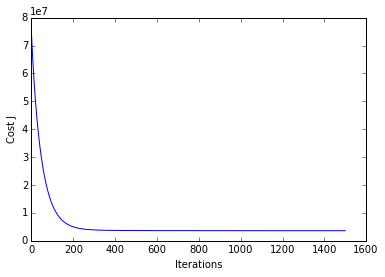

In [353]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(x, y, initial_theta)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
print Beta1 # very similar answers for analytical and gradient descent methods

## Regularised Gradient Descent

In [360]:
def GradReg(theta,x,y,lamb):
    # remember index 1 to end because we dont regularise the constant
    m = y.size
    h = x.dot(theta)
    grad =  (1/float(m)) * (x.T.dot(h-y)) 
    grad[1:] = grad[1:] + lamb/float(m) * theta[1:]
    return grad       

In [364]:
cost = regCostFunction(initial_theta,x,y,1)
gradient = GradReg(initial_theta,x,y,1)
print('Cost with Regularisation is: {}'.format(cost))
print('Gradient with Regularisation is: {}'.format(gradient))


Cost with Regularisation is: 75805464.02
Gradient with Regularisation is: [[-22.53280632]
 [  3.5415213 ]
 [ -3.30850184]
 [  4.44007841]
 [  3.9223466 ]
 [ -6.38265888]
 [  3.46003881]
 [ -2.29407785]
 [  4.3006576 ]
 [  4.66093742]
 [ -3.06081285]]


In [375]:
gradient

array([[-22.53280632],
       [  3.5415213 ],
       [ -3.30850184],
       [  4.44007841],
       [  3.9223466 ],
       [ -6.38265888],
       [  3.46003881],
       [ -2.29407785],
       [  4.3006576 ],
       [  4.66093742],
       [ -3.06081285]])

## Use an optimisation function to minimse Cost


In [372]:
def trainLinReg(theta,x,y,lamb):
    # optimisation function: minimize from scipy
    opt = minimize(regCostFunction, theta, args=(x,y,lamb), method='BFGS', jac=GradReg,
                   options={'maxiter':5000})
    return opt

In [1]:
fit = trainLinReg(initial_theta,x.T,y,1)

NameError: name 'trainLinReg' is not defined